## Week 12 Assignment - W200 Python Fundamentals for Data Science, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. This assignment addresses material covered in Unit 11. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. 

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

** DO NOT PUSH THIS FILE TO YOUR GITHUB REPO ! **

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say YOUR ANSWER HERE to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)

## Setup

Run the two cells below. 

The first cell will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.  

The second cell subsets the dataframe to focus on just the primary period through May 2016. Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
print(contrib.shape)

# Note - for now, it is okay to ignore the warning about mixed types. 

(1125659, 18)


In [72]:
# Subset data to primary period 
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(654502, 18)


## 1. Data  Exploration (20 points)

**1a. First, take a preliminary look at the data.**
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this data (link above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the `election_tp` variable contain?

In [73]:
# 1a YOUR CODE HERE
print(contrib.shape)
print(list(contrib))

(654502, 18)
['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp']


`1a YOUR RESPONSE HERE`
Printing the shape shows me that the data has 18 columns and 654,502 rows. Based on the listing of the column names, it does seem like all the columns included in the documentation are also in the dataset which I loaded. 
The election_tp variable indicates which kind of election the contribution was made for. The data is made up of a combination of a single upper case letter which denotes the type of election (primary, general etc) and the year as a 4-digit number.

**1b. Print the first 5 rows from the dataset to manually look through some of your data.**

In [74]:
# 1b YOUR CODE HERE
contrib.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c. Pick three variables from the dataset above and run some quick sanity checks.**

When working with a new dataset, it is important to explore and sanity check your variables.  For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use markdown cells to explain if your sanity checks "pass" your scrutiny or if you have concerns about the integrity of your data. 

In [139]:
# 1c YOUR CODE HERE for variable #1
#print(contrib.contb_receipt_amt.describe())
print(contrib.contb_receipt_amt[contrib["contb_receipt_amt"]<1].count())
print(contrib.contb_receipt_amt[contrib["contb_receipt_amt"]>1].count())
print(contrib.contb_receipt_amt[contrib["contb_receipt_amt"]<1].describe())
contrib[contrib["contb_receipt_amt"]<1].iloc[0:10]


7086
645087
count     7,086.00
mean       -683.32
std       1,049.15
min     -10,000.00
25%        -800.00
50%        -105.02
75%         -50.00
max           0.99
Name: contb_receipt_amt, dtype: float64


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
19,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","JOLLIFF, RICHARD",CHICO,CA,"959,289,507.00",SELF EMPLOYED,RANCHER,-25.00,2016-04-29,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1826482B,P2016
23,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","JOLLIFF, RICHARD",CHICO,CA,"959,289,507.00",SELF EMPLOYED,RANCHER,-150.00,2016-04-29,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1826483B,P2016
81,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","JOLLIFF, RICHARD",CHICO,CA,"959,289,507.00",SELF EMPLOYED,RANCHER,-60.00,2016-04-14,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1827494,P2016
190,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","NOWELL, DIANA L.",RANCHO SANTA MARGARITA,CA,"926,884,928.00",CAPISTRAND UNIFIED SCHOOL DISTRICT,LIBRARIAN TECHNICIAN,-100.00,2016-04-11,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1639830B,P2016
213,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LICHTY, ANDREW MR.",SAN DIEGO,CA,"921,096,720.00",SELF EMPLOYED,REAL ESTATE,-25.00,2016-04-30,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1826888B,P2016
220,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LICHTY, ANDREW MR.",SAN DIEGO,CA,"921,096,720.00",SELF EMPLOYED,REAL ESTATE,-25.00,2016-04-30,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1826894B,P2016
223,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LICHTY, ANDREW MR.",SAN DIEGO,CA,"921,096,720.00",SELF EMPLOYED,REAL ESTATE,-50.00,2016-04-30,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1826895B,P2016
231,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LICHTY, ANDREW MR.",SAN DIEGO,CA,"921,096,720.00",SELF EMPLOYED,REAL ESTATE,-50.00,2016-04-30,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1826886B,P2016
261,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","NOWELL, DIANA L.",RANCHO SANTA MARGARITA,CA,"926,884,928.00",CAPISTRAND UNIFIED SCHOOL DISTRICT,LIBRARIAN TECHNICIAN,-150.00,2016-04-11,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1639829B,P2016
307,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LICHTY, ANDREW MR.",SAN DIEGO,CA,"921,096,720.00",SELF EMPLOYED,REAL ESTATE,-50.00,2016-04-30,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1826889B,P2016


In [151]:
refunds = contrib[contrib["contb_receipt_amt"]<1]
refunds.groupby(refunds.receipt_desc)['receipt_desc'].count().sort_values(ascending=False)



receipt_desc
Refund                                                            4521
REDESIGNATION TO GENERAL                                          1324
REATTRIBUTION TO SPOUSE                                            529
REDESIGNATION TO PRESIDENTIAL GENERAL                               41
REFUND TO BE ISSUED; REDESIGNATION TO GENERAL                        9
REDESIGNATION TO PRIMARY                                             8
REATTRIBUTION TO SPOUSE, TERRIE SCHULTZ.                             3
REATTRIBUTION TO SPOUSE, HARRY HICKS.                                3
2016 SENATE PRIMARY DONOR REDESIGNATION TO GENERAL                   2
* REATTRIBUTED TO FRANK DARABONT                                     1
* REATTRIBUTED TO ERIC UHRANE                                        1
* REATTRIBUTED TO ELIZABETH DOYLE                                    1
US CITIZEN REDESIGNATION TO GENERAL                                  1
* REATTRIBUTED TO JOHN CASTOR                                   

In [158]:
# 1c YOUR CODE HERE for variable #2
print(contrib.tran_id.is_unique)
print(contrib.duplicated(['tran_id']).sum())
contrib.duplicated(['tran_id']).head()
contrib[contrib.duplicated(['tran_id'])].sort_values('tran_id').iloc[0:20]

False
2697


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
43573,C00575449,P40003576,"Paul, Rand","PARKS, PATRICIA MRS.",HUGHSON,CA,"95,326.00",SELF,HOUSEWIFE,200.00,2015-11-28,NaN,X,NaN,SA17A,1057798,A26C35A6066754130B99,P2016
42835,C00575449,P40003576,"Paul, Rand","PARKS, PATRICIA MRS.",HUGHSON,CA,"95,326.00",SELF,HOUSEWIFE,200.00,2015-11-28,NaN,X,NaN,SA17A,1057799,A26C35A6066754130B99,P2016
42820,C00575449,P40003576,"Paul, Rand","BREED, PAUL MR.",SOLANA BEACH,CA,"92,075.00",NET BURNER,ENGINEER,-500.00,2015-10-28,NaN,X,NaN,SA17A,1057799,A340DF85B7F884133A20,P2016
44679,C00575449,P40003576,"Paul, Rand","BREED, PAUL MR.",SOLANA BEACH,CA,"92,075.00",NET BURNER,ENGINEER,-500.00,2015-10-28,NaN,X,NaN,SA17A,1057798,A340DF85B7F884133A20,P2016
42821,C00575449,P40003576,"Paul, Rand","BREED, MARIELLEN",SOLANA BEACH,CA,"920,752,356.00",INFORMATION REQUESTED,INFORMATION REQUESTED,500.00,2015-10-28,NaN,X,NaN,SA17A,1057799,A4E50E2DD07E4475996F,P2016
44680,C00575449,P40003576,"Paul, Rand","BREED, MARIELLEN",SOLANA BEACH,CA,"920,752,356.00",INFORMATION REQUESTED,INFORMATION REQUESTED,500.00,2015-10-28,NaN,X,NaN,SA17A,1057798,A4E50E2DD07E4475996F,P2016
41393,C00575449,P40003576,"Paul, Rand","PARKS, ROBERT MR.",HUGHSON,CA,"953,260,412.00",SELF-EMPLOYED,FARMER,200.00,2015-09-30,NaN,X,NaN,SA17A,1057796,A5602AD777C8C4632B5A,G2016
42836,C00575449,P40003576,"Paul, Rand","PARKS, ROBERT MR.",HUGHSON,CA,"953,260,412.00",SELF-EMPLOYED,FARMER,200.00,2015-09-30,NaN,X,NaN,SA17A,1057799,A5602AD777C8C4632B5A,G2016
44685,C00575449,P40003576,"Paul, Rand","PARKS, ROBERT MR.",HUGHSON,CA,"953,260,412.00",SELF-EMPLOYED,FARMER,200.00,2015-09-30,NaN,X,NaN,SA17A,1057798,A5602AD777C8C4632B5A,G2016
44710,C00575449,P40003576,"Paul, Rand","PETERSON, PATRICK T. MR.",SAN JOSE,CA,"951,172,951.00",SELF,CONSULTING,171.83,2015-12-31,NaN,X,NaN,SA17A,1057798,A7C22FA389E0348F98F0,G2016


In [159]:
# 1c YOUR CODE HERE for variable #3
print(contrib.contbr_st.unique())
print(contrib.contbr_st.isnull().sum())


['CA']
0


`1c YOUR RESPONSE HERE`
The first analysis I conducted was to look at the variable "contb_receipt_amt". I wanted to see if the data included all positive values or there were any refunds. The analysis shows that 7086 of the contributions are negative numbers. When I subsetted the table to show only the negative contributions, the first 10 rows said "redesignation to general" which indicates that the dataset includes some donations which were redesignated. I generated a table which shows the counts of the different reasons for refund/redistribution. This analysis indicates that the data is likely slightly overestimating the candidate contributions if it's analyzed by counting or summing the rows in the table. For my subsequent analyses I didn't subset the data but if I was doing this for a real world application I would probalby drop all the negative values.

The next variable I looked at was the transaction ID (tran_id). The documentation says that each transaction should have a unique identifier, so I wanted to double check this. My analysis shows that there are 2697 duplicated values. Printing a table of the duplicates sorted by tran_id shows an example of the duplicate rows. Again, if I was conducting this analysis in real life I would drop the duplicates.

Lastly, I wanted to check that all the donations were from California. I used unique to check the number of values in the state column (contbr_st) and the only one included is CA. I checked if there were any null values using isnull. Both these analyses show that there are no missing values and all the donations are correctly labelled as originating in California.

**1d. Plotting a histogram** 

Make a histogram of **one** of the variables you picked above. What are some insights that you can see from this histogram? 
Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values
- Hint: For some variables the range of values is very large. To do a better exploration, make the initial histogram the full range and then you can make a smaller histogram 'zoomed' in on a discreet range.

Text(0, 0.5, 'Number of Donations')

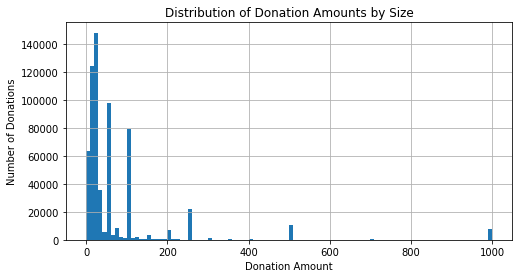

In [165]:
# 1d YOUR CODE HERE
#contrib.contb_receipt_amt.hist(bins=20, density=True)
#contrib.contb_receipt_amt.hist(bins=40, range=(0, 4000))
contrib.contb_receipt_amt.hist(bins=100, range=(0, 1000), figsize=(8,4))
plt.title("Distribution of Donation Amounts by Size")
plt.xlabel("Donation Amount")
plt.ylabel("Number of Donations")


`1d YOUR RESPONSE HERE`
This histogram of donations between 1-1000 USD shows that most of the donations are below a hundred dollars. It also shows two peaks at approximately 500 and 1000 USD, which may indicate contribution limits.

## 2. Exploring Campaign Contributions (30 points)

Let's investigate the donations to the candidates.

**2a. Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method.
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top. 

Which candidate received the largest number of contributions (variable 'contb_receipt_amt')?

In [78]:
# 2a YOUR CODE HERE
contrib_count= pd.DataFrame(contrib.groupby(contrib.cand_nm)['contb_receipt_amt'
                    ].count().sort_values(ascending=False))
contrib_count.rename(columns={'contb_receipt_amt': 'contb_receipt_number'}, inplace=True)
contrib_count

,contb_receipt_number
cand_nm,
"Sanders, Bernard",371795
"Clinton, Hillary Rodham",163509
"Cruz, Rafael Edward 'Ted'",57136
"Carson, Benjamin S.",27342
"Rubio, Marco",14089
"Fiorina, Carly",4696
"Paul, Rand",4256
"Bush, Jeb",3114
"Kasich, John R.",2988


`2a YOUR RESPONSE HERE`
Bernie Sanders had the highest number of individual contributions with 371795, more than double Hillary Clinton, the candidate with the next highest amount.

**2b. Now, present a table that shows the total value of donations to each candidate. sorted by total value of the donations**

Which candidate raised the most money in California?

In [79]:
# 2b YOUR CODE HERE
contrib_sum= pd.DataFrame(contrib.groupby(contrib.cand_nm)['contb_receipt_amt'
                ].sum().sort_values(ascending=False))
contrib_sum.rename(columns={'contb_receipt_amt': 'contb_receipt_total'}, inplace=True)
contrib_sum

,contb_receipt_total
cand_nm,
"Clinton, Hillary Rodham","39,368,777.01"
"Sanders, Bernard","18,773,871.31"
"Cruz, Rafael Edward 'Ted'","6,286,460.34"
"Rubio, Marco","4,846,483.72"
"Bush, Jeb","3,325,536.83"
"Carson, Benjamin S.","2,952,109.00"
"Kasich, John R.","1,553,823.54"
"Fiorina, Carly","1,468,489.42"
"Trump, Donald J.","893,356.89"


`2b YOUR RESPONSE HERE`
Hillary Clinton raised the largest amount of money.

**2c. Combine the tables (sorted by either a or b above).**

- What is the "type" of the two tables you presented above - Series or DataFrames?
- Convert any Series to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [80]:
# 2c YOUR CODE HERE
candidate_contrib = pd.merge(contrib_count, contrib_sum, on='cand_nm')

candidate_contrib

,contb_receipt_number,contb_receipt_total
cand_nm,,
"Sanders, Bernard",371795,"18,773,871.31"
"Clinton, Hillary Rodham",163509,"39,368,777.01"
"Cruz, Rafael Edward 'Ted'",57136,"6,286,460.34"
"Carson, Benjamin S.",27342,"2,952,109.00"
"Rubio, Marco",14089,"4,846,483.72"
"Fiorina, Carly",4696,"1,468,489.42"
"Paul, Rand",4256,"797,624.29"
"Bush, Jeb",3114,"3,325,536.83"
"Kasich, John R.",2988,"1,553,823.54"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation**

In [100]:
# 2d YOUR CODE HERE
candidate_contrib['ave_donation_amt'] = (candidate_contrib['contb_receipt_total']/
                                        candidate_contrib['contb_receipt_number'])
candidate_contrib = pd.DataFrame(candidate_contrib.sort_values(by='ave_donation_amt', ascending=True))
candidate_contrib


,contb_receipt_number,contb_receipt_total,ave_donation_amt
cand_nm,,,
"Sanders, Bernard",371795,"18,773,871.31",50.50
"Carson, Benjamin S.",27342,"2,952,109.00",107.97
"Cruz, Rafael Edward 'Ted'",57136,"6,286,460.34",110.03
"Stein, Jill",197,"27,918.00",141.72
"Paul, Rand",4256,"797,624.29",187.41
"Clinton, Hillary Rodham",163509,"39,368,777.01",240.77
"Fiorina, Carly",4696,"1,468,489.42",312.71
"Rubio, Marco",14089,"4,846,483.72",343.99
"Trump, Donald J.",2255,"893,356.89",396.17


**2e. Plotting a Bar Chart**

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Make the y-axis a log-scale to show both numbers!

Text(0, 0.5, 'Donations, million USD')

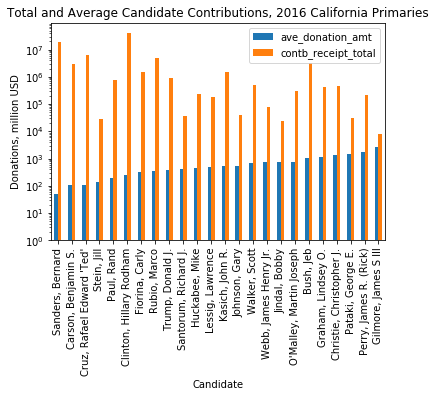

In [166]:
# 2e YOUR CODE HERE

candidate_contrib.plot(y=['ave_donation_amt','contb_receipt_total'], kind='bar', log=True)
plt.title("Total and Average Candidate Contributions, 2016 California Primaries")
plt.xlabel("Candidate")
plt.ylabel("Donations, million USD")

 

**2f. Comment on the results of your data analysis in a short paragraph.**

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

`2f YOUR RESPONSE HERE`
Key insights:
- Californians donated significantly more frequently to Democratic candidates than Republican candidates, with  Bernie Sanders and Hillary Clinton receiving, respectively, three and six times as many individual donations than Ted Cruz, the Republican candidate with the highest number of individual donations.
- While Hillary Clinton raised roughly twice as much money in total as Bernie Sanders, she raised this money from approximately half as many donations. Bernie Sanders donors tended to make smaller donations on average than Hillary Clinton Donors, with the mean donation to the Sanders campain being approximately 50 dollars versus 240 dollars.
- There appears to be a rough correlation between the total amount of money raised and the average size of the individual donations, with the candidates who received the least amount of money overall receiving higher average individual donations. I would want to do a regression analysis to examine the correlation, but going off the graph, the overall amount of money raised does appear to trend downwards as average donations increase. There are several outliers, however (i.e. Jill Stein had the fourth lowest average donation amount and also raised the third lowest amount of money) so I would want to perform further analysis to see if this trend was statistically signifiant.
- Finally, I don't know James Gillmore is, but I would be interested to see if the number of donations he received in the state of California (3) is equal to the number of living grandparents he has there, and also to know whether or not it bums him out to have received a grand total of three donations from a state with a population of 39.5 million.

## 3. Exploring Donor Occupations (30 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a. Show the top 5 occupations of individuals that contributed to Hillary Clinton.** 

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [121]:
# 3a YOUR CODE HERE
Hilary_occupations= pd.DataFrame(contrib.loc[contrib['cand_nm'] == 'Clinton, Hillary Rodham']
                        .contbr_occupation.value_counts().head())
Hilary_occupations



,contbr_occupation
RETIRED,33450
ATTORNEY,7315
INFORMATION REQUESTED,4742
TEACHER,3591
HOMEMAKER,3436


**3b. Write a function called `get_donors`.**

Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [125]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    return pd.DataFrame(df.contbr_occupation.value_counts().head())
    

**3c. Now run the `get_donors` function on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below.**

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [132]:
# 3c YOUR CODE HERE
print('Hilary Donors')
print(get_donors(contrib.loc[contrib['cand_nm'] == 'Clinton, Hillary Rodham']))
print('')
print('Bernie Donors')
print(get_donors(contrib.loc[contrib['cand_nm'] == 'Sanders, Bernard']))
print('')
print('Sigh.')
print(get_donors(contrib.loc[contrib['cand_nm'] == 'Trump, Donald J.']))

Hilary Donors
                       contbr_occupation
RETIRED                            33450
ATTORNEY                            7315
INFORMATION REQUESTED               4742
TEACHER                             3591
HOMEMAKER                           3436

Bernie Donors
                   contbr_occupation
NOT EMPLOYED                   96371
RETIRED                        15048
TEACHER                        10167
SOFTWARE ENGINEER               7861
ENGINEER                        7094

Sigh.
                       contbr_occupation
RETIRED                              849
INFORMATION REQUESTED                 70
CEO                                   57
OWNER                                 51
PRESIDENT                             35


**3d. Finally, use `groupby` to separate the entire dataset by candidate.**

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [130]:
# 3d YOUR CODE HERE
contrib.groupby(contrib.cand_nm).apply(get_donors)

contbr_occupation
cand_nm                                                                            
Bush, Jeb                 RETIRED                                               996
                          HOMEMAKER                                             180
                          ATTORNEY                                               92
                          Q.A.                                                   89
                          PRESIDENT                                              84
Carson, Benjamin S.       RETIRED                                             13692
                          INFORMATION REQUESTED PER BEST EFFORTS               1614
                          HOMEMAKER                                            1049
                          PHYSICIAN                                             329
                          R.N.                                                  234
Christie, Christopher J.  RETIRED                                                38
                          NONE                                                   22
                          CONSULTANT                                             18
                          CEO                                                    16
                          HOMEMAKER                                              15
Clinton, Hillary Rodham   RETIRED                                             33450
                          ATTORNEY                                             7315
                          INFORMATION REQUESTED                                4742
                          TEACHER                                              3591
                          HOMEMAKER                                            3436
Cruz, Rafael Edward 'Ted' RETIRED                                             22956
                          INFORMATION REQUESTED PER BEST EFFORTS               1651
                          HOMEMAKER                                            1261
                          ENGINEER                                             1080
                          TEACHER                                               838
Fiorina, Carly            RETIRED                                              1971
                          HOMEMAKER                                             169
                          ATTORNEY                                              140
                          INFORMATION REQUESTED PER BEST EFFORTS                 95
                          INVESTOR                                               64
Gilmore, James S III      FINANCIAL ADVISOR                                       1
                          COB                                                     1
                          INVESTMENT MANAGEMENT                                   1
Graham, Lindsey O.        RETIRED                                                78
                          INFORMATION REQUESTED PER BEST EFFORTS                 20
                          EXECUTIVE                                              15
                          PRINCIPAL                                              15
                          PORTFOLIO MANAGER                                      14
Huckabee, Mike            RETIRED                                               206
                          REQUESTED PER BEST EFFORTS                             36
                          HOMEMAKER                                              22
                          OWNER                                                  13
                          FUNERAL DIRECTOR                                       12
Jindal, Bobby             RETIRED                                                 5
                          ENGINEER                                                4
                          PROFESSOR                                               3
                          PHYSICIA

**3e. Comment on your data insights & findings in a short paragraph.**

`3e YOUR RESPONSE HERE`
This analysis demonstrates that retirees appear to have contributed the majority of doniations in the 2016 primaries. They make up the largest category of donors for almost all the candidates. Bernie Sanders was the notable exception, as he received donations from 96371 people who were not employed. Depending on one's interpretation, this is could either be viewed as the punchline to a joke told on Fox News, or an indication of his strong support from young people, who are more likely to be students than employed. The latter interpretation is supported by the fact that student did not appear to be listed in the top categories of occupations for any of the candidates, meaning that students may have been categorized as not employed in this data. 


**3f. Think about your findings in section 3 vs. your findings in section 2 of this assignment.**

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

`3f YOUR RESPONSE HERE`
The occupation data for Bernie Sanders donors suggests that the relatively small size of the average individual contribution received may have been related to the employment status of the donors, as people who are not employed, or studying, are less likely to have money to donate to a campaign.


## 4. Plotting Data (20 points)

There is an important element that we have not yet explored in this dataset - time.

**4a. Present a single line chart with the following elements.**

- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

Text(0, 0.5, 'Donations, USD')

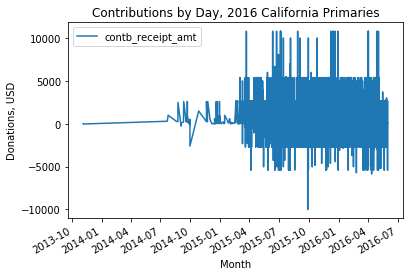

In [169]:
# 4a YOUR CODE HERE
contrib.plot.line(x='contb_receipt_dt', y='contb_receipt_amt')
plt.title("Contributions by Day, 2016 California Primaries")
plt.xlabel("Month")
plt.ylabel("Donations, USD")


**4b. Make a better time-series line chart**

This chart is messy and it is hard to gain insights from it.  Improve the chart from 4a so that your new chart shows a specific insight. In the spot provided, write the insight(s) that can be gained from this new time-series line chart.

Text(0, 0.5, 'Donations, USD')

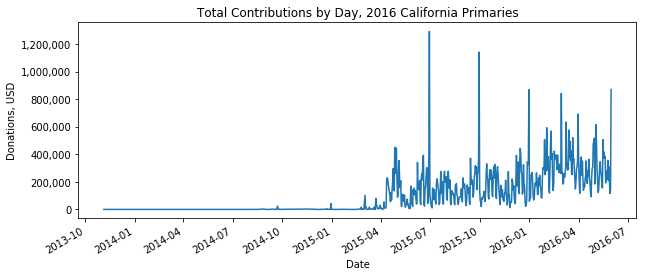

In [194]:
# 4b YOUR CODE HERE
import matplotlib.ticker as ticker

#going to drop the negatives first 
c_graph = contrib.drop(contrib[contrib.contb_receipt_amt<1].index)

#and remove the duplicate rows (just cause they were bugging me)
c_graph = c_graph.drop_duplicates( keep='first')

# to graph I'm going to group by the date and show the total contributions per date
# on the y axis
c_graph =c_graph.groupby(contrib.contb_receipt_dt)['contb_receipt_amt'].sum()

#formatting the y axis labels to make it easier to read the totals
c_graph.plot.line(figsize=(10,4)).get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Total Contributions by Day, 2016 California Primaries")
plt.xlabel("Date")
plt.ylabel("Donations, USD")

`4b YOUR RESPONSE HERE`
From the improved graph it is possible to determine a number of trends:
- Daily contribution amounts were very low until approximately March 2015
- There were major contribution spikes in July 2015, October 2015 and January 2016
- Daily contribution amounts became more frequent towards the end of the primary cycle, with higher per-day amounts but lower spikes
- There was a final spike in donations at or near the last day of the primary, which approached but was not as large as the major spikes in July and October 2015

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k